Kernel Classification Example

In [6]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(1000) #examples

## generate training data
X = np.random.rand(n,p)-0.5 #X is 1000 by 2
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1)) #for each row in X, sums the square of the features, then -0.1, and take the sign of that
#a^2 + b^2 - 0.1 > 0 #Y1  is a column vector with labels 

print(Y1.shape)


Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])
Y = np.hstack((Y1, Y2))

print(Y2.shape)

(1000, 2)
(1000, 1)
(1000, 1)


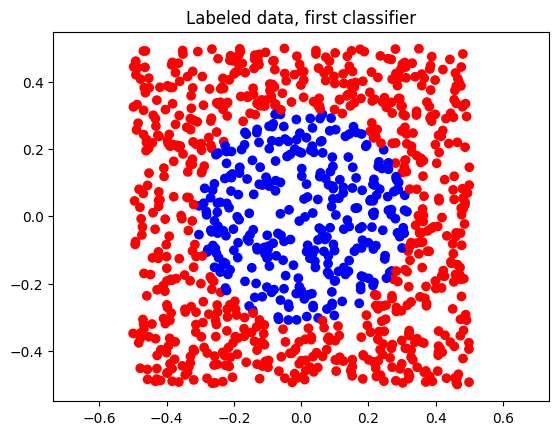

In [5]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], color=['b' if i==-1 else 'r' for i in Y1[:,0]])
plt.axis('equal')
plt.title('Labeled data, first classifier')
plt.show()

In [ ]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], color=['b' if i==-1 else 'r' for i in Y2[:,0]])
plt.title('Labeled data, second classifier')
plt.axis('equal')
plt.show()

(1000, 1)
100
100


C:\Users\admin\AppData\Local\Temp\ipykernel_14904\3216382158.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_grid[i,j] = kernel@alpha


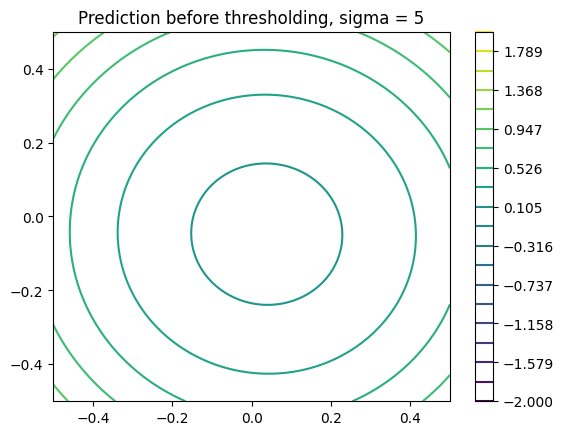

Text(0.5, 1.0, 'Prediction after thresholding, sigma = 5')

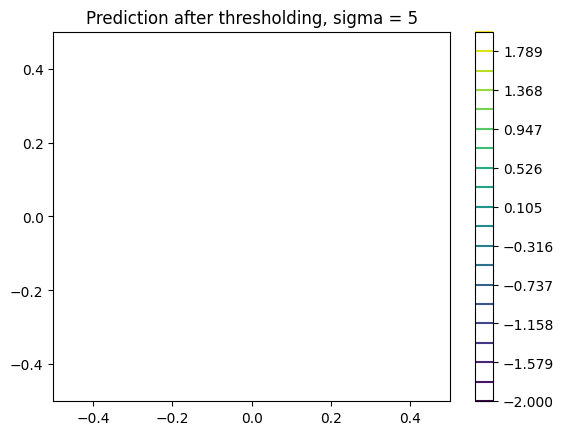

In [12]:
# Train Classifier 1
sigma = 5
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:]) #the ith row - jth row -> difference vector of each pair of datapoints
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2)) #K is the kernel matrix, K[i,j] represents a value that shows how similar the ith point and the jth point is

alpha = np.linalg.inv(K+lam*np.identity(n))@Y1 #alpha = 1000 x 1, each weight corresbond to a training data point
print(alpha.shape)


# Predict labels on a grid of points 

X_grid = []
prediction_grid = []

g = 100 #number of grid points
prediction_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g) #a 1-D array that represents all the values of the first feature
print(len(x1_grid))
x2_grid = np.linspace(-.5,.5,g)#a 1-D array that represents all the values of the second feature
print(len(x2_grid))

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        kernel = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2)) 
        #computes the Gaussian kernel between this point and every point in the dataset
        #kernel is a column vector, each element is the kernel value between point (x1, x2) and each training data point
      
        prediction_grid[i,j] = kernel@alpha

plt.contour(x1_grid, x2_grid, prediction_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(prediction_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))

In [ ]:
# Train Classifier 2
sigma = 5
lam = 0.01

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y2


# Predict labels on a grid of points 
X_grid = []
Y_hat_grid = []

g = 100 #number of grid points
Y_hat_grid = np.zeros((g,g))

x1_grid = np.linspace(-.5,.5,g)
x2_grid = np.linspace(-.5,.5,g)

for i,x1 in enumerate(x1_grid):
    for j,x2 in enumerate(x2_grid):
        Y_hat_grid[i,j] = np.exp(-np.linalg.norm(X - np.array([x1,x2]), axis = 1)**2/(2*sigma**2))@alpha

plt.contour(x1_grid, x2_grid, Y_hat_grid, np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction before thresholding, sigma = '+ str(sigma))
plt.show()

plt.contour(x1_grid, x2_grid, np.sign(Y_hat_grid), np.linspace(-2,2,20))
plt.colorbar()
plt.title('Prediction after thresholding, sigma = '+ str(sigma))